# **Final Data Preprocessing, Feature Engineering, and Dimensionality Reduction for Rent Price Prediction**

This notebook focuses on preparing a property dataset for machine learning model training by performing extensive data preprocessing, feature engineering, and dimensionality reduction. The objective is to predict rent prices based on various property attributes, spatial data, and sentiment analysis. Key steps include handling missing data, normalizing features, transforming skewed distributions, and reducing the dataset’s dimensionality through Principal Component Analysis (PCA). The notebook is structured as follows:

---
### **Table Of Contents**

1. **Data Loading & Exploration:**
    * Load the unprocessed dataset and perform basic statistical analysis.
    * Visualize feature distributions and relationships between key variables.

2. **Feature Engineering:**

    * Create new features such as squared internal area, log-transformed features, and apply Box-Cox transformations to handle non-normal distributions.
    * Introduce interaction terms and feature transformations to enhance model predictive power.

3. **Handling Missing Data:**
    *Use KNN imputation to fill missing values in important features like Bond.

4. **Categorical Encoding:**
    * Apply One-Hot Encoding to categorical features such as property type, suburb, and dominant topic label.

5. **Normalisation:**
    * Standardize numerical features to ensure consistent feature scaling, essential for machine learning algorithms.

6. **Mutual Information Feature Selection:**
    * Compute mutual information scores for each feature and select the top features based on their predictive power.

7. **Dimensionality Reduction with PCA:**
    * Apply PCA to reduce the dimensionality of the dataset while retaining 95% of the variance.
    * Select the most important components for further modeling.



## **1. Data Loading & Exploration:**

In [153]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

In [154]:
unprocessed = pd.read_csv("../data/curated/input.csv")
unprocessed.describe()

,Rent_Price,Bedrooms,Bathrooms,Parking,Latitude,Longitude,Bond,Internal_Area,Land_Area,Postcode,...,Secure Parking,Intercom,Heating,Ensuite,Balcony / Deck,Fully fenced,Days_From_Now,negative_class,positive_class,School_Counts
count,12302.000000,12302.000000,12302.000000,12302.000000,12302.000000,12302.000000,11379.000000,140.000000,624.000000,12301.000000,...,12302.000000,12302.000000,12302.000000,12302.000000,12302.000000,12302.000000,12302.000000,12302.000000,12302.000000,12302.000000
mean,571.240775,2.528938,1.506747,1.245732,-37.789206,144.916322,2493.045522,117.649286,1566.689416,3188.415007,...,0.128922,0.112339,0.096488,0.091042,0.079174,0.075354,7.500732,0.057064,0.941066,5.942855
std,145.663158,1.062520,0.570025,0.864823,0.378428,0.482042,2710.638019,199.806979,13750.084016,236.311636,...,0.335127,0.315796,0.295272,0.287681,0.270021,0.263972,25.689100,0.231974,0.235510,3.486008
min,155.000000,0.000000,0.000000,0.000000,-38.396861,141.588032,3.000000,2.000000,1.000000,3000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,480.000000,2.000000,1.000000,1.000000,-37.885127,144.867200,2063.000000,55.300000,300.750000,3030.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,550.000000,2.000000,1.000000,1.000000,-37.820562,144.968185,2390.000000,73.600000,512.000000,3124.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
75%,650.000000,3.000000,2.000000,2.000000,-37.765965,145.070534,2824.000000,92.000000,654.250000,3204.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,8.000000
max,995.000000,5.000000,5.000000,5.000000,-34.168360,147.679251,282440.000000,2020.000000,283279.949400,3978.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1031.000000,1.000000,1.000000,17.000000


### **Examining the data distribution of each feature**

This section examines the distribution of key features in the dataset to better understand their characteristics before proceeding with transformations and modeling. Various visualizations, including histograms and pair plots, are employed to display the frequency distributions and relationships between features such as `Bedrooms,` `Bathrooms,` `Parking,` `Internal Area,` `Distance to Nearest Station,` and `School Counts.` These plots help identify skewed distributions, potential outliers, and relationships between variables that may influence rent price predictions.

## **2. Feature Engineering:**

This section also transforms features to better fit the assumptions of models.

/Users/tinas/anaconda3/envs/group25env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tinas/anaconda3/envs/group25env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tinas/anaconda3/envs/group25env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tinas/anaconda3/envs/group25env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

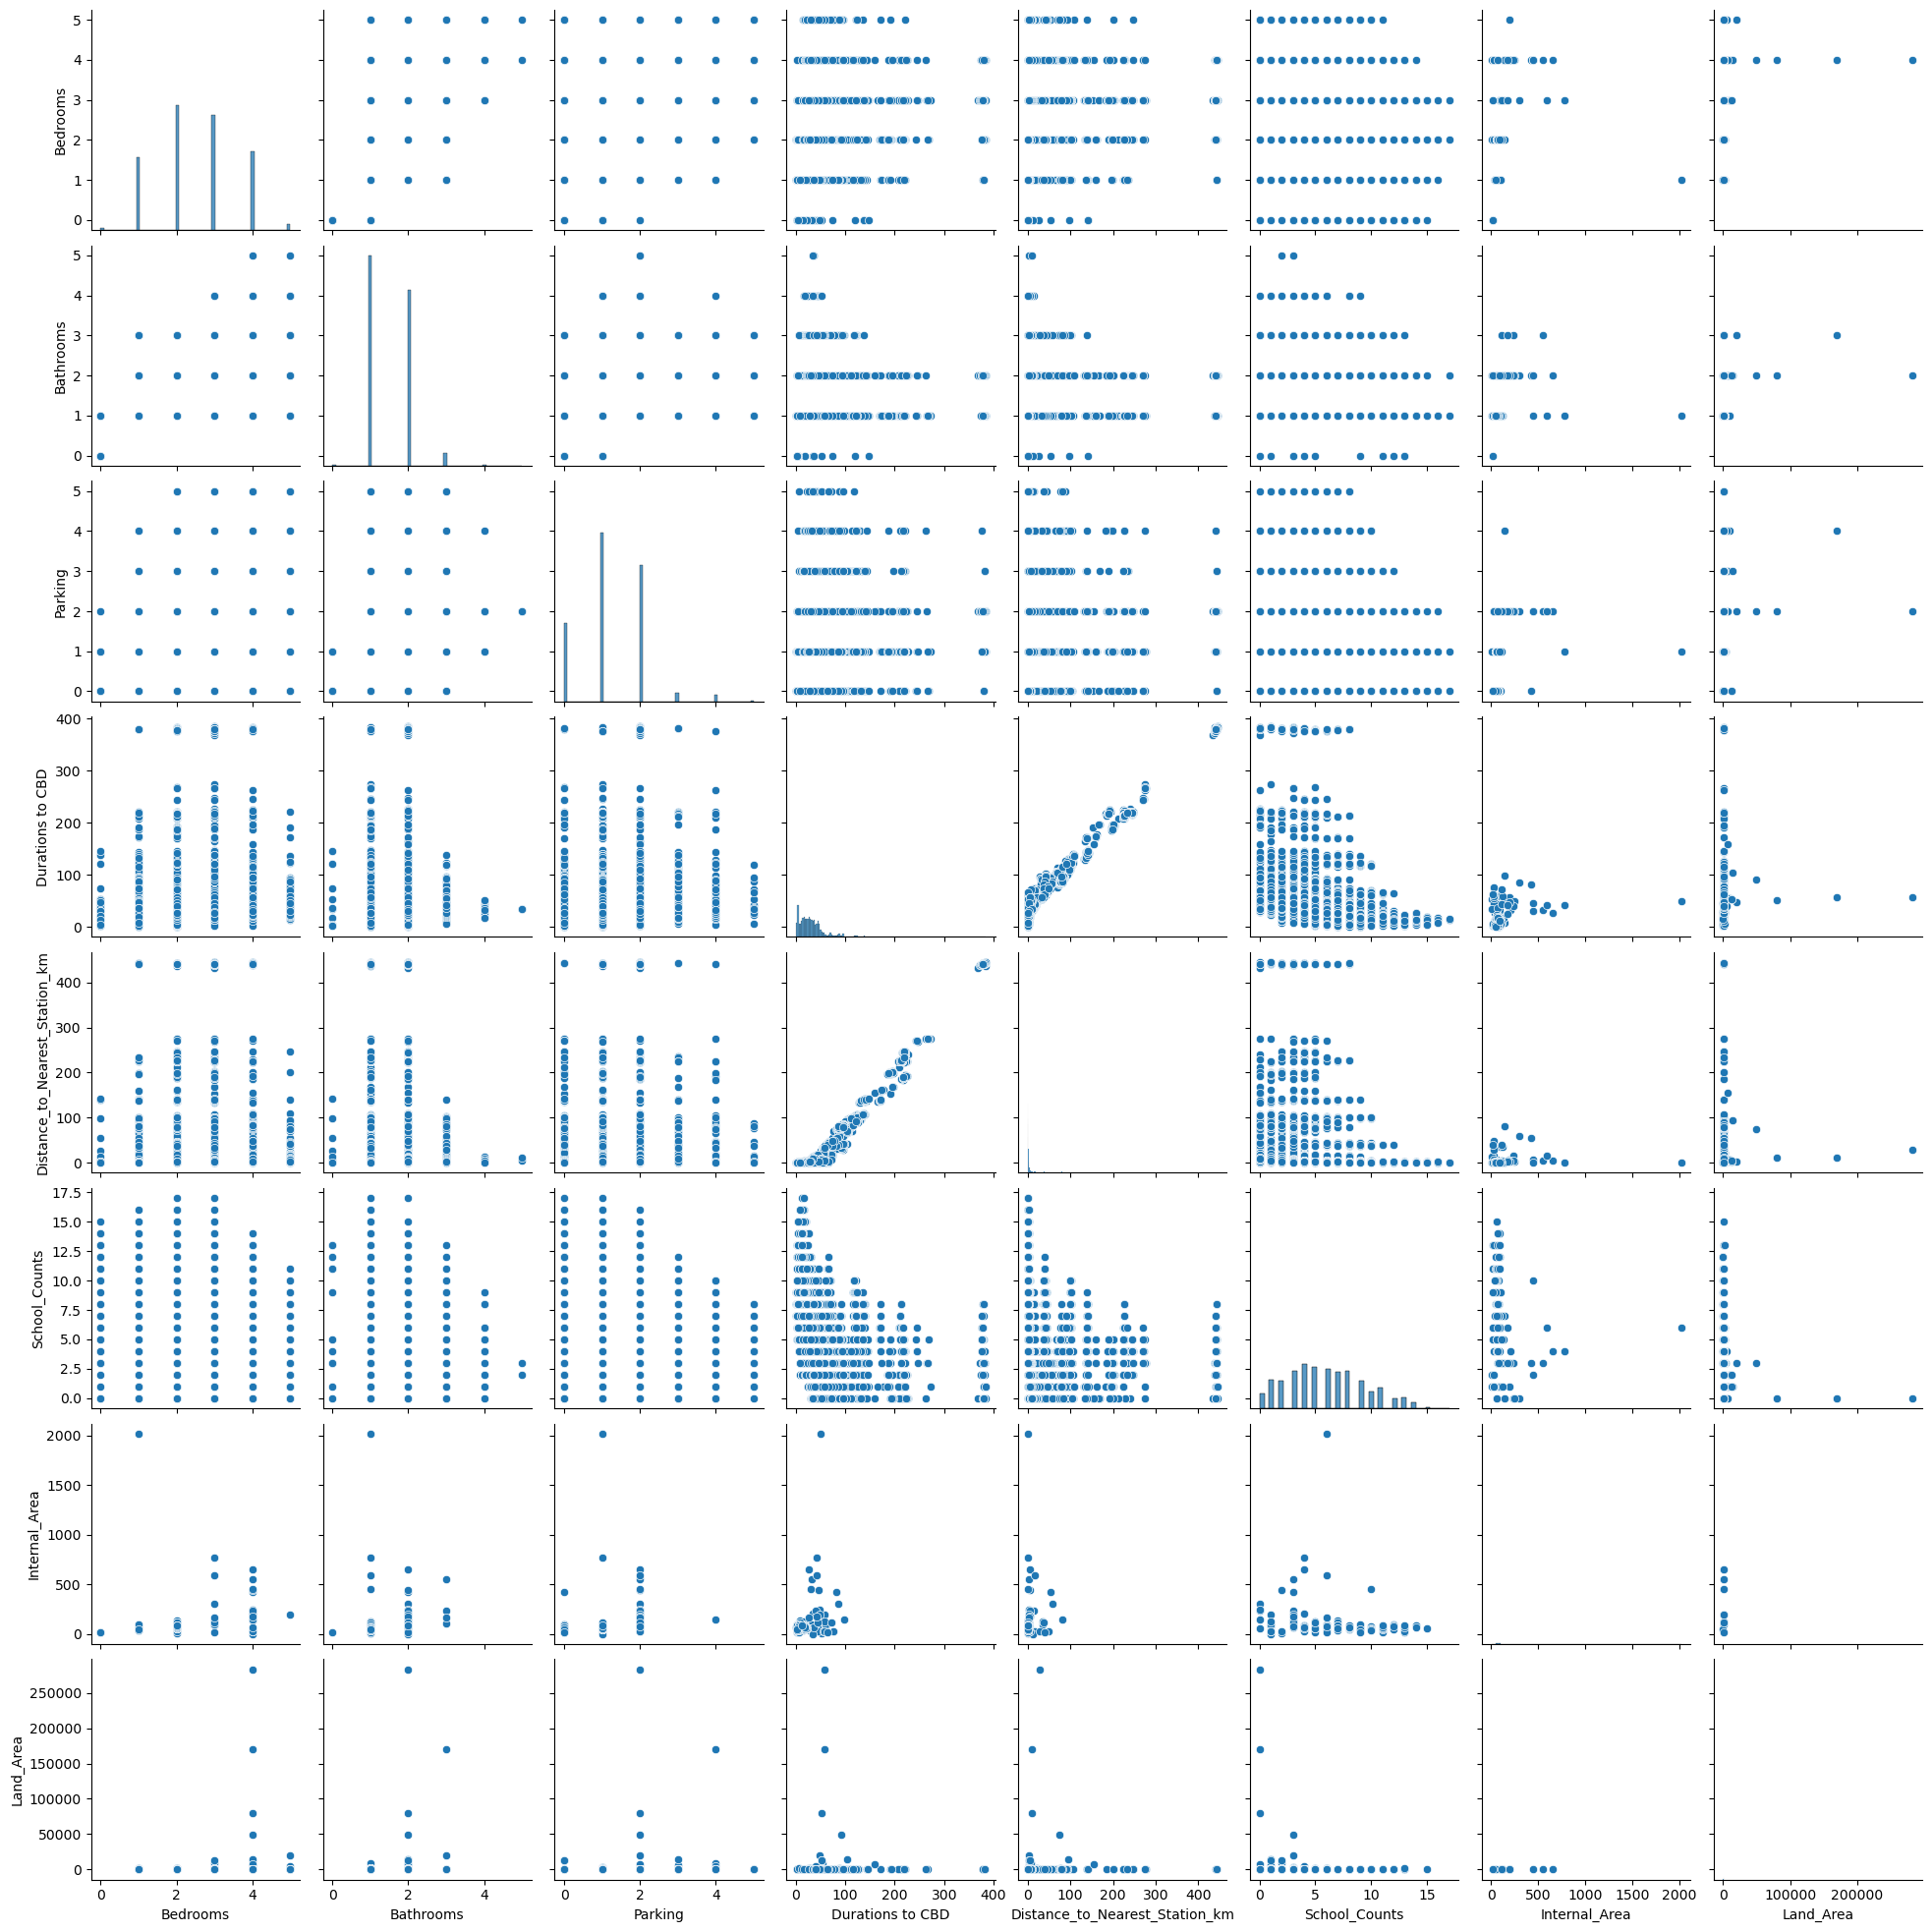

In [155]:
pairplot = sns.pairplot(unprocessed[['Bedrooms', 'Bathrooms', 'Parking', 'Durations to CBD','Distance_to_Nearest_Station_km', 'School_Counts', 'Internal_Area', 'Land_Area']])
pairplot.savefig('../plots/pairplot_rent_features.png')
plt.show()

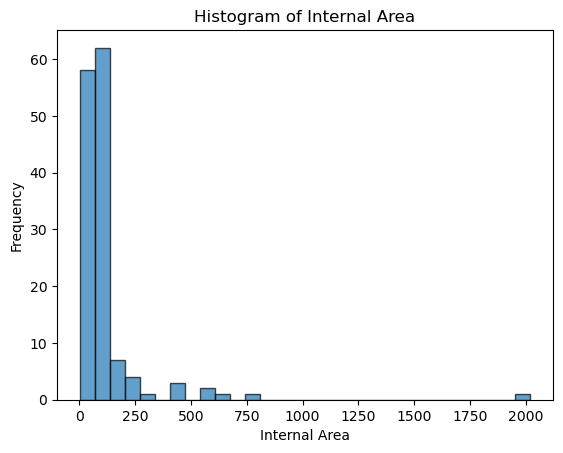

In [156]:
plt.hist(unprocessed['Internal_Area'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Internal Area')
plt.ylabel('Frequency')
plt.title('Histogram of Internal Area')

plt.savefig('../plots/histogram_internal_area.png')

plt.show()

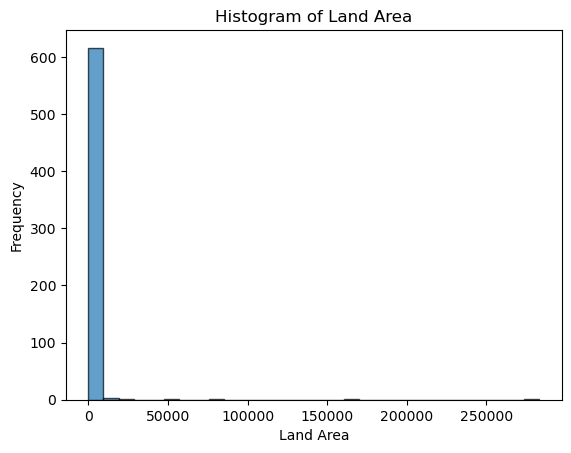

In [157]:
plt.hist(unprocessed['Land_Area'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Land Area')
plt.ylabel('Frequency')
plt.title('Histogram of Land Area')
plt.savefig('../plots/histogram_land_area.png')
plt.show()

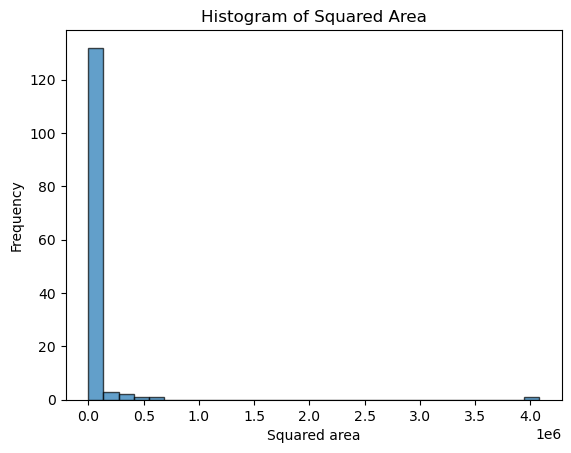

In [158]:
unprocessed['IntArea_squared'] = np.square(unprocessed['Internal_Area'])

plt.hist(unprocessed['IntArea_squared'], bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Squared area')
plt.ylabel('Frequency')
plt.title('Histogram of Squared Area')
plt.savefig('../plots/histogram_squared_area.png')
plt.show()

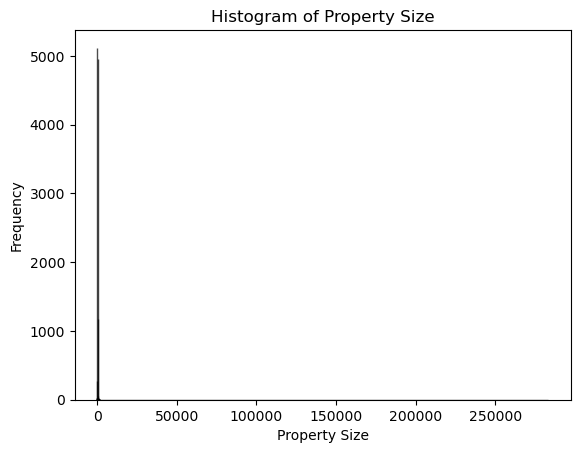

In [159]:
plt.hist(unprocessed['Property_Size'], bins="auto", edgecolor='k', alpha=0.7)
plt.xlabel('Property Size')
plt.ylabel('Frequency')
plt.title('Histogram of Property Size')
plt.savefig('../plots/histogram_property_size.png')
plt.show()


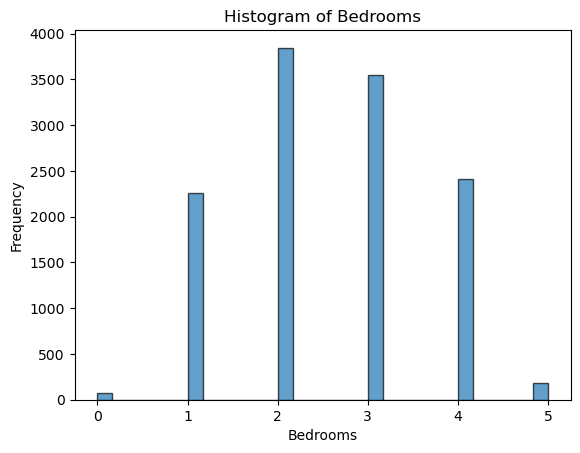

In [160]:
plt.hist(unprocessed['Bedrooms'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Bedrooms')
plt.savefig('../plots/histogram_bedrooms.png')
plt.show()


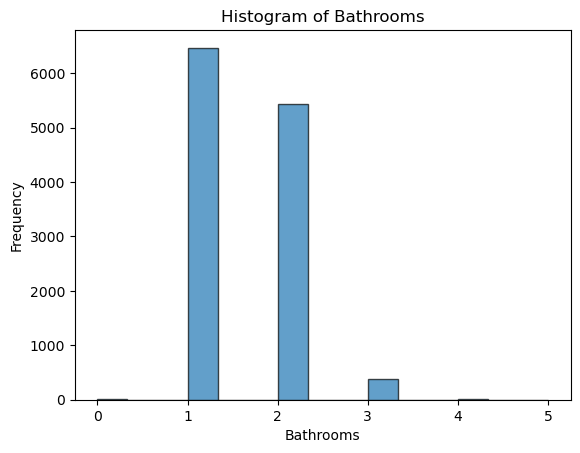

In [161]:
plt.hist(unprocessed['Bathrooms'], bins=15, edgecolor='k', alpha=0.7)
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Bathrooms')
plt.savefig('../plots/histogram_bathrooms.png')
plt.show()

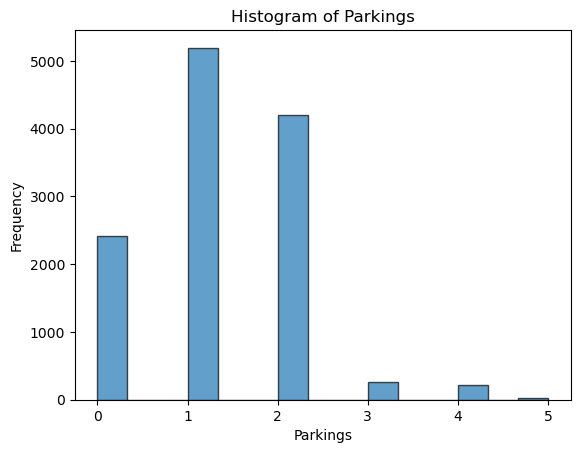

In [162]:
plt.hist(unprocessed['Parking'], bins=15, edgecolor='k', alpha=0.7)
plt.xlabel('Parkings')
plt.ylabel('Frequency')
plt.title('Histogram of Parkings')

plt.savefig('../plots/histogram_parkings.png')
plt.show()

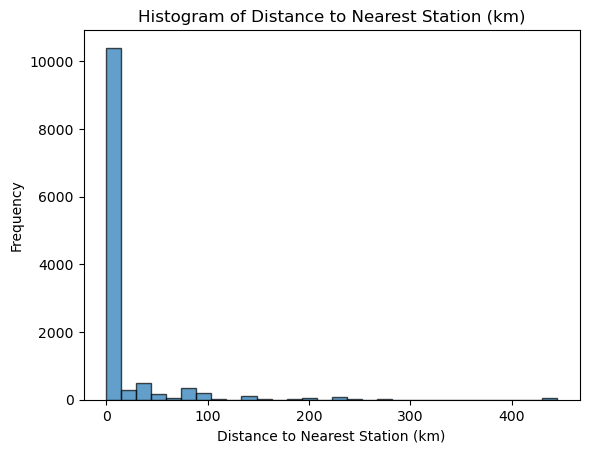

In [163]:
plt.hist(unprocessed['Distance_to_Nearest_Station_km'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Distance to Nearest Station (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance to Nearest Station (km)')
plt.savefig('../plots/histogram_distStation.png')
plt.show()


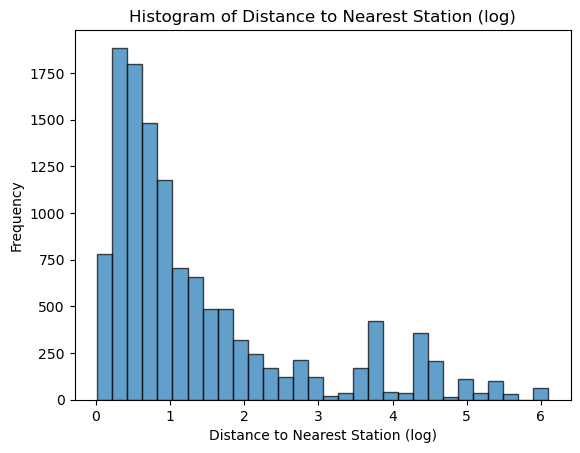

In [164]:
unprocessed['Distance_to_Nearest_Station_log'] = np.log1p(unprocessed['Distance_to_Nearest_Station_km']) 
plt.hist(unprocessed['Distance_to_Nearest_Station_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Distance to Nearest Station (log)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance to Nearest Station (log)')
plt.savefig('../plots/histogram_logDistStation.png')
plt.show()


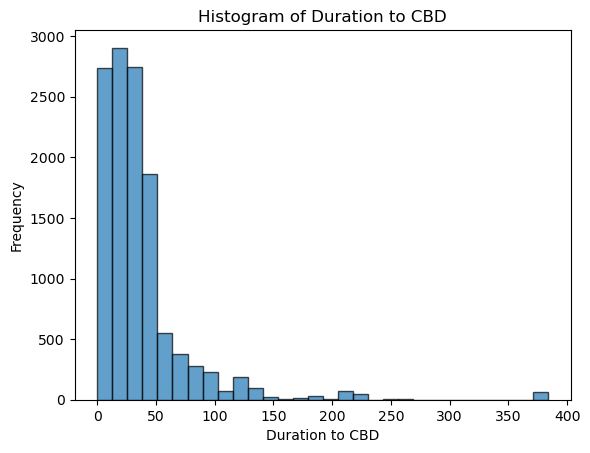

In [165]:
plt.hist(unprocessed['Durations to CBD'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Duration to CBD')
plt.ylabel('Frequency')
plt.title('Histogram of Duration to CBD')
plt.savefig('../plots/histogram_durCBD.png')
plt.show()


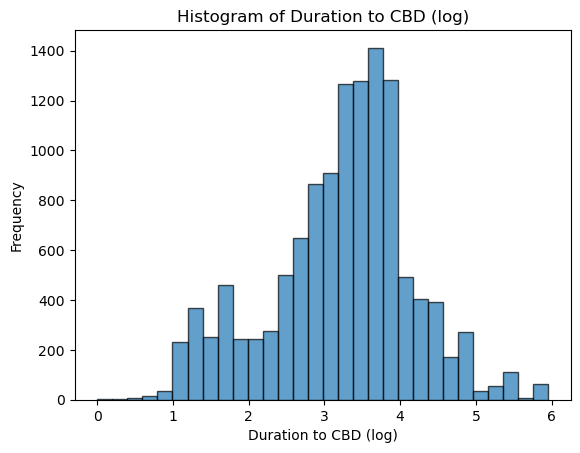

In [166]:
unprocessed['CBDDurations_log'] = np.log1p(unprocessed['Durations to CBD']) 
plt.hist(unprocessed['CBDDurations_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Duration to CBD (log)')
plt.ylabel('Frequency')
plt.title('Histogram of Duration to CBD (log)')
plt.savefig('../plots/histogram_logCBDDur.png')
plt.show()


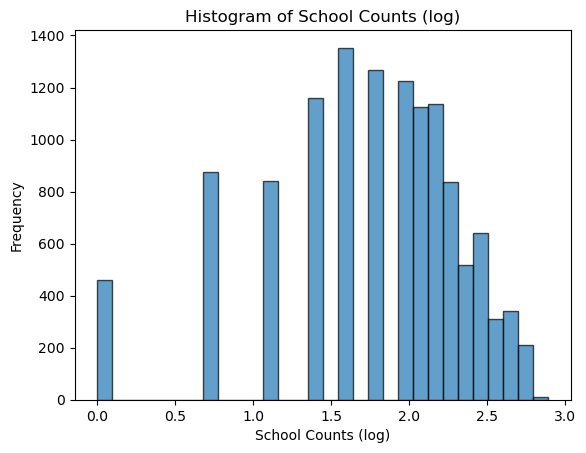

In [167]:
unprocessed['School_Counts_log'] = np.log1p(unprocessed['School_Counts'])
plt.hist(unprocessed['School_Counts_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('School Counts (log)')
plt.ylabel('Frequency')
plt.title('Histogram of School Counts (log)')
plt.savefig('../plots/histogram_log_schoolCounts.png')
plt.show()


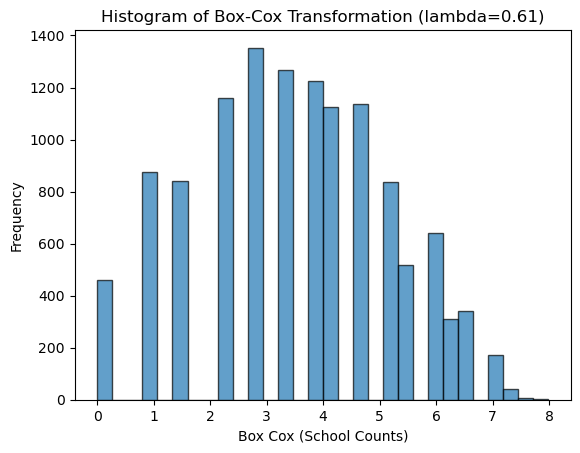

In [168]:
school_counts_positive = unprocessed['School_Counts'] + 1
unprocessed['School_Counts_boxcox'], lambda_ = boxcox(school_counts_positive)

plt.hist(unprocessed['School_Counts_boxcox'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Box Cox (School Counts)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Box-Cox Transformation (lambda={lambda_:.2f})')
plt.savefig('../plots/histogram_boxcox_schoolCounts.png')
plt.show()


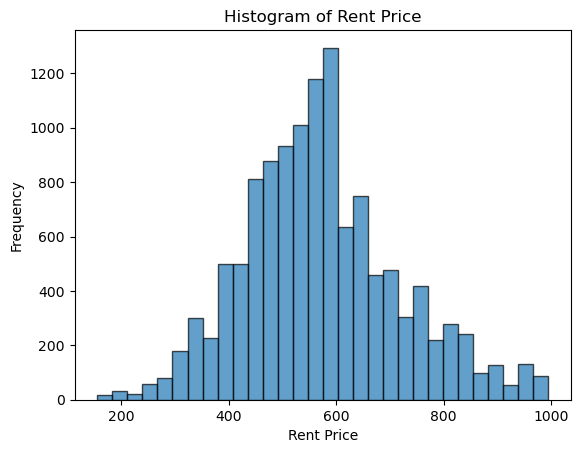

In [169]:
plt.hist(unprocessed['Rent_Price'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Rent Price')
plt.ylabel('Frequency')
plt.title('Histogram of Rent Price')
plt.savefig('../plots/histogram_rentPrice.png')
plt.show()


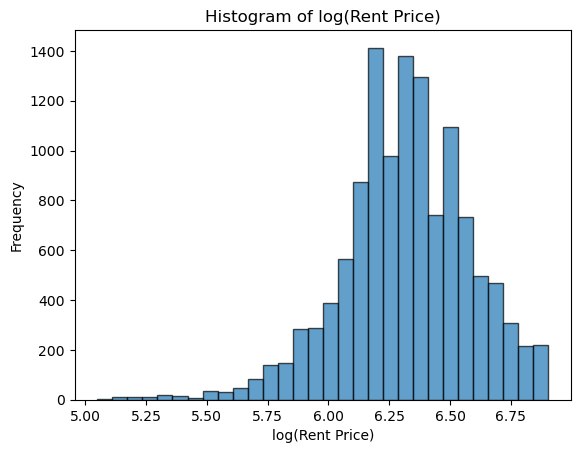

In [170]:
unprocessed["Rent_Price_log"] = np.log1p(unprocessed["Rent_Price"])
plt.hist(unprocessed['Rent_Price_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('log(Rent Price)')
plt.ylabel('Frequency')
plt.title('Histogram of log(Rent Price)')
plt.savefig('../plots/histogram_log_rentPrice.png')
plt.show()

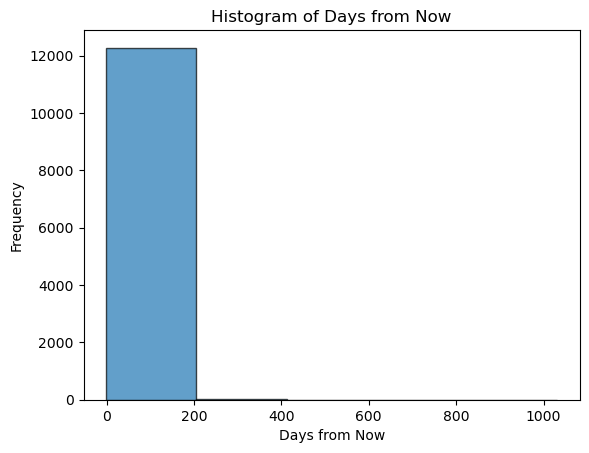

In [171]:
plt.hist(unprocessed['Days_From_Now'], bins=5, edgecolor='k', alpha=0.7)
plt.xlabel('Days from Now')
plt.ylabel('Frequency')
plt.title('Histogram of Days from Now')
plt.savefig('../plots/histogram_daysFromNow.png')
plt.show()


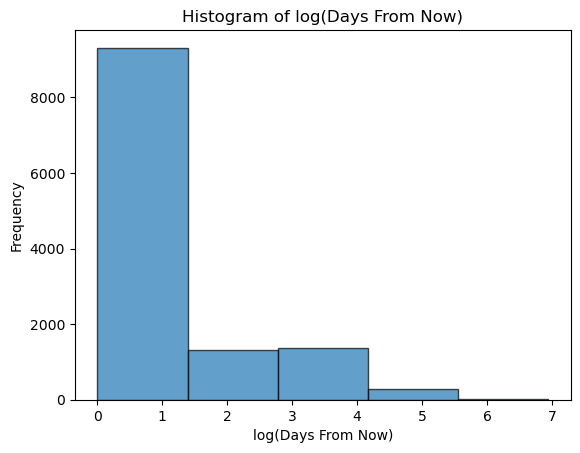

<Figure size 640x480 with 0 Axes>

In [172]:
unprocessed["Days_From_Now"] = unprocessed["Days_From_Now"].apply(lambda x: 0 if x < 0 else x)
unprocessed["Days_From_Now"].unique()

plt.hist(np.log1p(unprocessed['Days_From_Now']), bins=5, edgecolor='k', alpha=0.7)
plt.xlabel('log(Days From Now)')
plt.ylabel('Frequency')
plt.title('Histogram of log(Days From Now)')
plt.show()
plt.savefig('../plots/histogram_log_daysFromNow.png')
unprocessed['Days_From_Now'] = np.log1p(unprocessed['Days_From_Now'])

## **3. Handling Missing Data:**

This section checks for any missing data. In the later section, the Bonds will be imputed by KNN.

In [173]:
unprocessed = unprocessed.drop(["Street"], axis = 1)
unprocessed = unprocessed[['Rent_Price_log', 'Bedrooms', 'Bathrooms', 'Parking', 'Property_Type',
        'Suburb', 'Postcode', 'Distance_to_Nearest_Station_log', 'CBDDurations_log',
        'Sentiment',  "Feature_Count", "Bond",
       'Dominant_Topic_Label', 'negative_class',
       'positive_class', 'School_Counts_boxcox', "Property_Size",  "Date_Available",
        'Built in wardrobes', 'Dishwasher', 'Air conditioning', 'Floorboards',
       'Secure Parking', 'Intercom', 'Heating', 'Ensuite', 'Balcony / Deck',
       'Fully fenced', 'Days_From_Now']]
unprocessed.isnull().sum()

Rent_Price_log                       0
Bedrooms                             0
Bathrooms                            0
Parking                              0
Property_Type                        0
Suburb                               1
Postcode                             1
Distance_to_Nearest_Station_log      0
CBDDurations_log                     0
Sentiment                            0
Feature_Count                        0
Bond                               923
Dominant_Topic_Label                 0
negative_class                       0
positive_class                       0
School_Counts_boxcox                 0
Property_Size                        0
Date_Available                       0
Built in wardrobes                   0
Dishwasher                           0
Air conditioning                     0
Floorboards                          0
Secure Parking                       0
Intercom                             0
Heating                              0
Ensuite                  

                                 Bedrooms  Bathrooms  CBDDurations_log  \
Bedrooms                         1.000000   0.623817          0.509448   
Bathrooms                        0.623817   1.000000          0.254815   
CBDDurations_log                 0.509448   0.254815          1.000000   
Parking                          0.649193   0.431414          0.498239   
negative_class                  -0.056174  -0.035496          0.003356   
positive_class                   0.058633   0.036571         -0.002264   
Sentiment                        0.150898   0.108613          0.010527   
School_Counts_boxcox            -0.537142  -0.382672         -0.623908   
Distance_to_Nearest_Station_log  0.362813   0.176095          0.745023   
Bond                             0.070074   0.095409         -0.065761   
Property_Size                    0.042388   0.032238          0.030974   
Feature_Count                   -0.020665   0.079664         -0.138510   
Rent_Price_log                   0.362

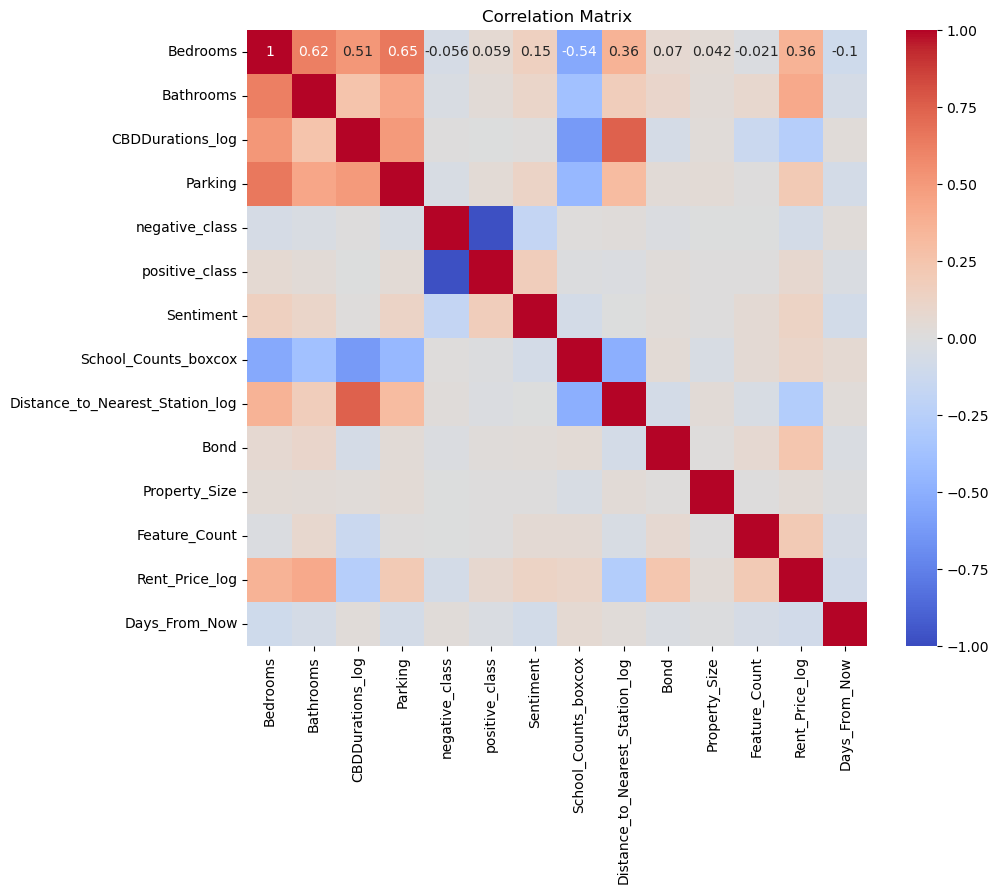

In [174]:
correlation_matrix = unprocessed[['Bedrooms', 'Bathrooms', 'CBDDurations_log', 
                                'Parking','negative_class', 'positive_class',
                                'Sentiment','School_Counts_boxcox', 
                                'Distance_to_Nearest_Station_log', 'Bond', 
                                "Property_Size","Feature_Count", 'Rent_Price_log', "Days_From_Now"]].corr()

print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


3. Handling Missing Data:

In [175]:
processed = unprocessed.copy()
numerical_features =['Bedrooms', 'Bathrooms', 'CBDDurations_log', 
                    'Parking','negative_class', 'positive_class',
                    'Sentiment','School_Counts_boxcox', 
                    'Distance_to_Nearest_Station_log', 'Bond', 
                    "Property_Size","Feature_Count", 'Days_From_Now']
categorical_features = ['Property_Type', 'Suburb', 'Postcode', 'Dominant_Topic', 'Sentiment', "Date_Available",
               'Built in wardrobes', 'Dishwasher', 'Air conditioning', 'Floorboards',
                'Secure Parking', 'Intercom', 'Heating', 'Ensuite', 'Balcony / Deck',
                'Fully fenced']

In [176]:
X = processed.drop(["Rent_Price_log"], axis = 1)
y = processed['Rent_Price_log']
print(X.isnull().sum())

# Split train:test into 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

Bedrooms                             0
Bathrooms                            0
Parking                              0
Property_Type                        0
Suburb                               1
Postcode                             1
Distance_to_Nearest_Station_log      0
CBDDurations_log                     0
Sentiment                            0
Feature_Count                        0
Bond                               923
Dominant_Topic_Label                 0
negative_class                       0
positive_class                       0
School_Counts_boxcox                 0
Property_Size                        0
Date_Available                       0
Built in wardrobes                   0
Dishwasher                           0
Air conditioning                     0
Floorboards                          0
Secure Parking                       0
Intercom                             0
Heating                              0
Ensuite                              0
Balcony / Deck           

## **4. Categorical Encoding:**

In this section, categorical features are transformed into numerical representations to make them usable by machine learning algorithms. One-Hot Encoding is applied to variables like `Property Type,` `Suburb,` `Postcode,` and `Dominant Topic Label.` This process creates binary columns for each category, ensuring that the model can interpret categorical data effectively without assuming any ordinal relationships between categories. Handling unknown categories with the `handle_unknown` parameter ensures robustness when new data is encountered during testing or deployment.

In [177]:
# Specify the categorical features to be encoded
categorical_encoding = ['Property_Type', 'Suburb', 'Postcode', 'Dominant_Topic_Label']

# Initialize the OneHotEncoder, dropping the first category to avoid multicollinearity, and handle unknown categories by ignoring them
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Fit the OneHotEncoder on the categorical features of the training set
onehot_encoder.fit(X_train[categorical_encoding])

# Transform both training and test sets based on the fitted encoder

X_train_encoded = onehot_encoder.transform(X_train[categorical_encoding])
X_test_encoded = onehot_encoder.transform(X_test[categorical_encoding])

encoded_columns = onehot_encoder.get_feature_names_out(categorical_encoding)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

X_train = pd.concat([X_train.drop(columns=categorical_encoding), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_encoding), X_test_encoded_df], axis=1)

# Map the 'Date_Available' feature to binary values, 1 for 'Available Now' and 0 for 'Later'
X_train['Date_Available'] = X_train['Date_Available'].map({'Available Now': 1, 'Later': 0})
X_test['Date_Available'] = X_test['Date_Available'].map({'Available Now': 1, 'Later': 0})

print(X_train.head())
print(X_test.head())


       Bedrooms  Bathrooms  Parking  Distance_to_Nearest_Station_log  \
11370         3          1        3                         0.590573   
6198          3          1        2                         0.790785   
8547          4          2        1                         2.052429   
4490          4          1        2                         0.688132   
11114         2          1        1                         5.244562   

       CBDDurations_log  Sentiment  Feature_Count    Bond  negative_class  \
11370          3.519054   0.666667              5  2281.0             0.0   
6198           3.240141   0.456667              0  1993.0             0.0   
8547           3.661303   0.412500              0  2237.0             0.0   
4490           2.885741   0.408636              0  3911.0             0.0   
11114          5.383986   0.200000              2  1400.0             1.0   

       positive_class  ...  Postcode_3936.0  Postcode_3938.0  Postcode_3976.0  \
11370             1.0  

/Users/tinas/anaconda3/envs/group25env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [178]:
# Initialise the KNNImputer with 3 nearest neighbors to impute missing values
imputer = KNNImputer(n_neighbors=3)

X_train[['Bond']] = imputer.fit_transform(X_train[['Bond']])
X_test[['Bond']] = imputer.transform(X_test[['Bond']])


In [179]:
# Initialise the StandardScaler, which standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

# Transform both the training and test sets using the fitted scaler
X_train_scaled = scaler.transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)


In [180]:
X_train = X_train.drop(columns=numerical_features)
X_test = X_test.drop(columns=numerical_features)

X_train = pd.concat([X_train, X_train_scaled_df], axis=1)
X_test = pd.concat([X_test, X_test_scaled_df], axis=1)

print(X_train.head())
print(X_test.head())


       Date_Available  Built in wardrobes  Dishwasher  Air conditioning  \
11370               1                   1           0                 0   
6198                0                   0           0                 0   
8547                1                   0           0                 0   
4490                0                   0           0                 0   
11114               1                   0           0                 0   

       Floorboards  Secure Parking  Intercom  Heating  Ensuite  \
11370            0               0         0        1        0   
6198             0               0         0        0        0   
8547             0               0         0        0        0   
4490             0               0         0        0        0   
11114            0               0         0        0        0   

       Balcony / Deck  ...   Parking  negative_class  positive_class  \
11370               0  ...  2.018169       -0.245902        0.249861   
6198    

## **6. Mutual Information Feature Selection:**

In this section, mutual information (MI) scores are computed to evaluate the dependency between each feature and the target variable, rent price. MI measures how much knowing one feature reduces uncertainty about the target variable, offering a non-linear evaluation of feature relevance. Higher MI scores indicate stronger predictive power for that feature. The top features, based on their MI scores, are selected for the model to focus on the most informative predictors, enhancing the model's performance and reducing noise from less relevant features.

In [181]:
mi_scores = mutual_info_regression(X_train, y_train)
mi_scores_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})

features = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(features.head(30))

top_features = features['Feature'].iloc[:30].values
top_features

mi_scores_df.to_csv("../data/historical/important.csv")

                                               Feature  MI Score
773                                               Bond  3.660771
772                    Distance_to_Nearest_Station_log  0.240060
766                                   CBDDurations_log  0.222458
764                                           Bedrooms  0.160214
765                                          Bathrooms  0.131298
774                                      Property_Size  0.080962
771                               School_Counts_boxcox  0.071563
770                                          Sentiment  0.066699
767                                            Parking  0.064756
776                                      Days_From_Now  0.046858
17                                Property_Type_Studio  0.046380
2                                           Dishwasher  0.039438
775                                      Feature_Count  0.030277
13                                 Property_Type_House  0.028559
4                        

## **7. Dimensionality Reduction with PCA:**

In this section, Principal Component Analysis (PCA) is applied to reduce the dimensionality of the dataset while retaining most of the variance. PCA transforms the original features into a smaller set of uncorrelated components, ordered by the amount of variance they capture. This process simplifies the dataset by focusing on the most important information, helping to improve model performance and computational efficiency. The goal is to retain 95% of the dataset's variance with fewer components, ensuring that the key information is preserved for model training.

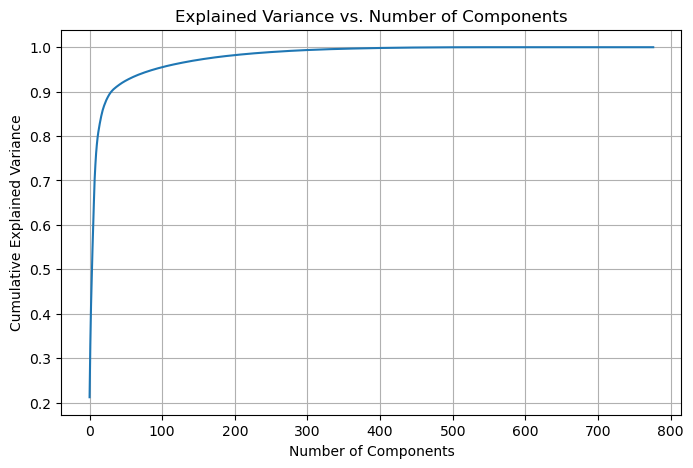

In [182]:
pca_full = PCA()
pca_full.fit(X_train)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()


In [183]:
# Set the target variance to retain, in this case 95% of the total variance
target_variance = 0.95

# Calculate the cumulative variance explained by each principal component
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components needed to retain 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= target_variance) + 1
print(f"Number of components to retain 95% of variance: {n_components_95}")

# Initialize PCA with the number of components required to retain 95% of the variance
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca_train = pd.DataFrame(X_train_pca)
pca_test = pd.DataFrame(X_test_pca)

Number of components to retain 95% of variance: 90


In [184]:
print(X_train.isnull().sum().sum())  # Should be 0
print(X_test.isnull().sum().sum())   # Should be 0

0
0


In [185]:
mi_scores = mutual_info_regression(pca_train, y_train)
mi_scores_df = pd.DataFrame({'Feature': pca_train.columns, 'MI Score': mi_scores})

feature_ranking = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(feature_ranking.head(30))

top_features = feature_ranking['Feature'].iloc[:30].values
pca_train_top = pca_train[top_features]
pca_test_top = pca_test[top_features]

input_train = pca_train[top_features]
input_test = pca_test[top_features]

    Feature  MI Score
4         4  0.216221
2         2  0.184697
1         1  0.146108
42       42  0.134538
52       52  0.127212
47       47  0.125474
35       35  0.124962
56       56  0.119693
38       38  0.118133
37       37  0.114541
36       36  0.111857
44       44  0.107008
45       45  0.104780
40       40  0.103440
32       32  0.102735
0         0  0.101483
48       48  0.100496
43       43  0.096372
33       33  0.096068
28       28  0.094268
68       68  0.093668
59       59  0.093371
62       62  0.092814
31       31  0.091661
77       77  0.091210
39       39  0.089320
25       25  0.088915
41       41  0.087945
58       58  0.087892
46       46  0.087367


In [186]:
pca_train.to_csv("../data/input/X_train.csv", index = False)
pca_test.to_csv("../data/input/X_test.csv", index = False)
y_train.to_csv("../data/input/y_train.csv", index = False)
y_test.to_csv("../data/input/y_test.csv", index = False)